In [1]:
!python -m pip install -U pandas
!python -m pip install -U matplotlib

In [2]:
import pandas as pd
import os
from datetime import datetime as dt
from matplotlib.dates import date2num, DateFormatter
import matplotlib.pyplot as plt

# Create a single dataframe from ALL the raw data

In [3]:
workdir = 'Diabetes-Data'

In [4]:
l = []

for dirname, _, filenames in os.walk(workdir):
    for filename in filenames:
        if filename.startswith("data"):
            token = filename.split('-')
            patient_id = token[1]
            path = os.path.join(dirname, filename)
            df = pd.read_table(path, index_col=None, names=['Date', 'Time', 'Code', 'Value'])
            df['Patient ID'] = patient_id
            l.append(df)

df_data = pd.concat(l, axis=0, ignore_index=True)
df_data

,Date,Time,Code,Value,Patient ID
0,05-20-1991,08:00,58,101,31
1,05-20-1991,08:00,33,5,31
2,05-20-1991,08:00,34,27,31
3,05-20-1991,12:00,60,89,31
4,05-20-1991,12:00,33,3,31
...,...,...,...,...,...
29325,09-25-1990,12:08,33,3,44
29326,09-25-1990,15:49,64,56,44
29327,09-25-1990,20:05,63,327,44
29328,09-25-1990,20:07,33,5,44


# Draw a table where the first column is the patient ID, and the second column is how long (in days) the experiment lasted for each patient.

In [5]:
patient_id_list = []
experiment_lasted_list = []
for dirname, _, filenames in os.walk(workdir):
    for filename in filenames:
        if filename.startswith("data"):
            token = filename.split('-')
            patient_id = token[1]
            path = os.path.join(dirname, filename)
            df = pd.read_table(path, index_col=None, names=['Date', 'Time', 'Code', 'Value'])
            last_date = df['Date'].iloc[-1]
            first_date = df['Date'][0]
            first_date_dt = dt.strptime(first_date, "%m-%d-%Y")
            last_date_dt = dt.strptime(last_date, "%m-%d-%Y")
            delta = last_date_dt - first_date_dt
            patient_id_list.append(patient_id)
            experiment_lasted_list.append(delta.days)

list_tuples = list(zip(patient_id_list, experiment_lasted_list))
dframe = pd.DataFrame(list_tuples, columns=['Patient ID', 'Experiment Lasted'])  

In [6]:
dframe

,Patient ID,Experiment Lasted
0,31,87
1,36,33
2,09,27
3,07,34
4,38,29
...,...,...
65,10,33
66,28,170
67,17,30
68,43,30


# Draw a chart: Filter the dataframe so that there is only patient 0. Plot out a line chart for patient 0, use a blue line to represent “Pre-lunch blood glucose measurement” and a red line to represent “Post-lunch blood glucose measurement” and a green line to represent “Regular insulin dose”.

In [7]:
df_patient_01 = pd.read_table(workdir+'/data-01', index_col=None, names=['Date', 'Time', 'Code', 'Value'])

In [8]:
df_patient_01 = df_data[df_data['Patient ID'] == '01']

In [9]:
df_patient_01

,Date,Time,Code,Value,Patient ID
4634,04-21-1991,9:09,58,100,01
4635,04-21-1991,9:09,33,9,01
4636,04-21-1991,9:09,34,13,01
4637,04-21-1991,17:08,62,119,01
4638,04-21-1991,17:08,33,7,01
...,...,...,...,...,...
5572,09-02-1991,17:30,33,7,01
5573,09-02-1991,23:00,48,155,01
5574,09-03-1991,7:20,58,110,01
5575,09-03-1991,7:20,33,9,01


In [10]:
df_patient_01['Datetime'] = df_patient_01['Date'].astype(str) + " " + df_patient_01['Time']

/var/folders/q3/xzddlmyx2cv9xnrc5j55g05r0000gp/T/ipykernel_6047/2430932938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_patient_01['Datetime'] = df_patient_01['Date'].astype(str) + " " + df_patient_01['Time']


In [11]:
df_patient_01

,Date,Time,Code,Value,Patient ID,Datetime
4634,04-21-1991,9:09,58,100,01,04-21-1991 9:09
4635,04-21-1991,9:09,33,9,01,04-21-1991 9:09
4636,04-21-1991,9:09,34,13,01,04-21-1991 9:09
4637,04-21-1991,17:08,62,119,01,04-21-1991 17:08
4638,04-21-1991,17:08,33,7,01,04-21-1991 17:08
...,...,...,...,...,...,...
5572,09-02-1991,17:30,33,7,01,09-02-1991 17:30
5573,09-02-1991,23:00,48,155,01,09-02-1991 23:00
5574,09-03-1991,7:20,58,110,01,09-03-1991 7:20
5575,09-03-1991,7:20,33,9,01,09-03-1991 7:20


In [12]:
prelunch = 60
postlunch = 61
regular_insulin = 33

In [13]:
prelunch_df = df_patient_01[df_patient_01['Code'] == prelunch]
postlunch_df = df_patient_01[df_patient_01['Code'] == postlunch]
regular_insulin_df = df_patient_01[df_patient_01['Code'] == regular_insulin]

In [14]:
prelunch_df['Datetime_fmt'] = prelunch_df['Datetime'].apply(lambda x : date2num(dt.strptime(x, "%m-%d-%Y %H:%M")))
postlunch_df['Datetime_fmt'] = postlunch_df['Datetime'].apply(lambda x : date2num(dt.strptime(x, "%m-%d-%Y %H:%M")))
regular_insulin_df['Datetime_fmt'] = regular_insulin_df['Datetime'].apply(lambda x : date2num(dt.strptime(x, "%m-%d-%Y %H:%M")))

/var/folders/q3/xzddlmyx2cv9xnrc5j55g05r0000gp/T/ipykernel_6047/1917309827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prelunch_df['Datetime_fmt'] = prelunch_df['Datetime'].apply(lambda x : date2num(dt.strptime(x, "%m-%d-%Y %H:%M")))
/var/folders/q3/xzddlmyx2cv9xnrc5j55g05r0000gp/T/ipykernel_6047/1917309827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regular_insulin_df['Datetime_fmt'] = regular_insulin_df['Datetime'].apply(lambda x : date2num(dt.strptime(x, "%m-%d-%Y %H:%M")))


In [15]:
prelunch_df

,Date,Time,Code,Value,Patient ID,Datetime,Datetime_fmt
4687,04-29-1991,13:38,60,192,01,04-29-1991 13:38,7788.568056
4695,04-30-1991,12:55,60,88,01,04-30-1991 12:55,7789.538194
4705,05-01-1991,12:14,60,60,01,05-01-1991 12:14,7790.509722
4720,05-03-1991,13:23,60,81,01,05-03-1991 13:23,7792.557639
4838,05-21-1991,11:50,60,162,01,05-21-1991 11:50,7810.493056
4850,05-23-1991,15:00,60,148,01,05-23-1991 15:00,7812.625000
4878,05-27-1991,13:48,60,220,01,05-27-1991 13:48,7816.575000
4885,05-28-1991,12:52,60,64,01,05-28-1991 12:52,7817.536111
4892,05-29-1991,13:25,60,125,01,05-29-1991 13:25,7818.559028
4900,05-30-1991,13:53,60,187,01,05-30-1991 13:53,7819.578472


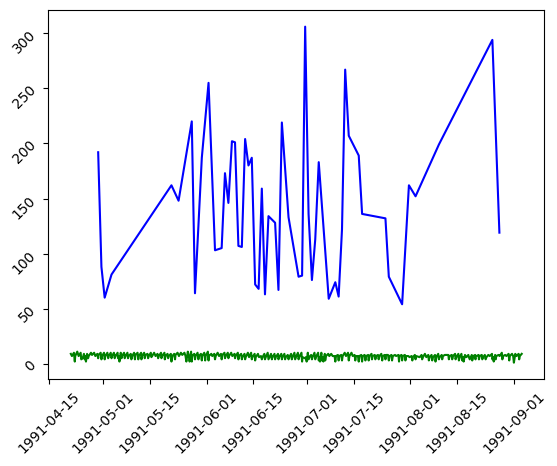

In [16]:
fig, ax = plt.subplots()
ax.plot_date(prelunch_df['Datetime_fmt'], prelunch_df['Value'], 'b')
ax.plot_date(postlunch_df['Datetime_fmt'], postlunch_df['Value'], 'r')
ax.plot_date(regular_insulin_df['Datetime_fmt'], regular_insulin_df['Value'], 'g')
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
ax.tick_params(rotation=45)
plt.show()